# Bayesian Inference with Gaussian Distributions

Bayesian inference with Gaussian distributions is a cornerstone of probabilistic modeling, particularly in cases where the data or parameters are assumed to follow a Gaussian distribution. The key idea in Bayesian inference is to update our beliefs about unknown parameters (or latent variables) based on observed data, using Bayes' theorem:

$$
p(\theta \mid D) = \frac{p(D \mid \theta) p(\theta)}{p(D)},
$$

where:

- $\theta$: Parameters or latent variables of interest.  
- $D$: Observed data.  
- $p(\theta)$: Prior distribution over $\theta$.  
- $p(D \mid \theta)$: Likelihood of the data given $\theta$.  
- $p(\theta \mid D)$: Posterior distribution of $\theta$ given the data.  

When both the prior and likelihood are Gaussian, the posterior also has a closed-form Gaussian solution, making Bayesian inference particularly tractable.

---

## 1. Conjugate Priors for Gaussians  

In Bayesian inference, if the prior and likelihood belong to the same family of distributions, the prior is called a **conjugate prior**. For Gaussian likelihoods, there are two common conjugate priors depending on the parameterization:

### Case 1: Known Variance, Unknown Mean ($\mu$)  

If the variance $\sigma^2$ is known, the conjugate prior for the mean $\mu$ is a Gaussian distribution:  

$$
\mu \sim \mathcal{N}(\mu_0, \sigma_0^2),
$$  

where $\mu_0$ and $\sigma_0^2$ are the prior mean and variance.  

### Case 2: Unknown Variance ($\sigma^2$)  

If the variance $\sigma^2$ is unknown, the conjugate prior for $\sigma^2$ is an inverse-gamma distribution:  

$$
\sigma^2 \sim \text{Inverse-Gamma}(\alpha, \beta),
$$  

where $\alpha$ and $\beta$ are hyperparameters.  

For simplicity, we will focus on the first case (known variance, unknown mean), as it leads to elegant Gaussian updates.

---

## 2. Bayesian Inference with Known Variance  

### Likelihood  

Assume the data $D = \{x_1, x_2, \ldots, x_n\}$ are i.i.d. samples from a univariate Gaussian distribution with known variance $\sigma^2$ and unknown mean $\mu$:  

$$
x_i \mid \mu \sim \mathcal{N}(\mu, \sigma^2).
$$  

The likelihood of the data given $\mu$ is:  

$$
p(D \mid \mu) = \prod_{i=1}^n \mathcal{N}(x_i \mid \mu, \sigma^2).
$$  

Taking the log-likelihood and simplifying, we get:  

$$
p(D \mid \mu) \propto \exp\left(-\frac{n}{2\sigma^2} (\mu - \bar{x})^2\right),
$$  

where $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$ is the sample mean.

### Prior  

The prior distribution for $\mu$ is Gaussian:  

$$
\mu \sim \mathcal{N}(\mu_0, \sigma_0^2).
$$  

### Posterior  

Using Bayes' theorem, the posterior distribution is proportional to the product of the likelihood and the prior:  

$$
p(\mu \mid D) \propto p(D \mid \mu) p(\mu).
$$  

Substituting the Gaussian forms of the likelihood and prior, we find that the posterior is also Gaussian:  

$$
\mu \mid D \sim \mathcal{N}(\mu_n, \sigma_n^2),
$$  

where:  

- **Updated mean:**  
  $$
  \mu_n = \frac{\sigma_0^2 \cdot n \bar{x} + \sigma^2 \mu_0}{n \sigma_0^2 + \sigma^2}
  $$  

- **Updated variance:**  
  $$
  \sigma_n^2 = \left( \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2} \right)^{-1}
  $$  

These expressions show how the posterior mean is a weighted average of the prior mean $\mu_0$ and the sample mean $\bar{x}$, with weights determined by the relative precisions ($1/\sigma_0^2$ and $n/\sigma^2$).

---

## 3. Multivariate Case  

In the multivariate case, assume $X_i \in \mathbb{R}^d$ are i.i.d. samples from a multivariate Gaussian distribution:  

$$
X_i \mid \mu \sim \mathcal{N}(\mu, \Sigma),
$$  

where $\Sigma$ is the known covariance matrix and $\mu$ is the unknown mean vector.

### Likelihood  

The likelihood is:  

$$
p(D \mid \mu) \propto \exp\left(-\frac{n}{2} (\mu - \bar{x})^\top \Sigma^{-1} (\mu - \bar{x})\right),
$$  

where $\bar{x} = \frac{1}{n} \sum_{i=1}^n X_i$ is the sample mean vector.

### Prior  

The prior for $\mu$ is a multivariate Gaussian:  

$$
\mu \sim \mathcal{N}(\mu_0, \Sigma_0),
$$  

where $\mu_0$ is the prior mean vector and $\Sigma_0$ is the prior covariance matrix.

### Posterior  

The posterior distribution is also Gaussian:  

$$
\mu \mid D \sim \mathcal{N}(\mu_n, \Sigma_n),
$$  

where:  

- **Updated mean:**  
  $$
  \mu_n = \Sigma_n \left(\Sigma_0^{-1} \mu_0 + n \Sigma^{-1} \bar{x}\right)
  $$  

- **Updated covariance:**  
  $$
  \Sigma_n = \left(\Sigma_0^{-1} + n \Sigma^{-1}\right)^{-1}
  $$  

---

## 4. Unknown Variance  

If the variance $\sigma^2$ (or covariance matrix $\Sigma$) is unknown, the prior for $\sigma^2$ is typically chosen to be an inverse-gamma distribution:  

$$
\sigma^2 \sim \text{Inverse-Gamma}(\alpha, \beta).
$$  

The posterior for $\sigma^2$ can then be derived analytically, and the joint posterior for $\mu$ and $\sigma^2$ can be expressed as a product of a Gaussian distribution for $\mu$ and an inverse-gamma distribution for $\sigma^2$. This setup is often used in hierarchical models.

---

## 5. Applications  

### Linear Regression  

In Bayesian linear regression, the weights $\beta$ are modeled as Gaussian random variables:  

$$
\beta \sim \mathcal{N}(\mu_0, \Sigma_0).
$$  

Given data $X$ and $y$, the posterior distribution of $\beta$ is updated using the likelihood $y \mid \beta \sim \mathcal{N}(X\beta, \sigma^2 I)$.

### Kalman Filtering  

The Kalman filter uses Bayesian inference to estimate the state of a dynamic system under Gaussian noise assumptions. Both the state transition and observation models are Gaussian, allowing for efficient recursive updates.

### Gaussian Processes  

Gaussian processes extend Bayesian inference to nonparametric settings, where the prior over functions is Gaussian. Observations update the posterior distribution over functions.


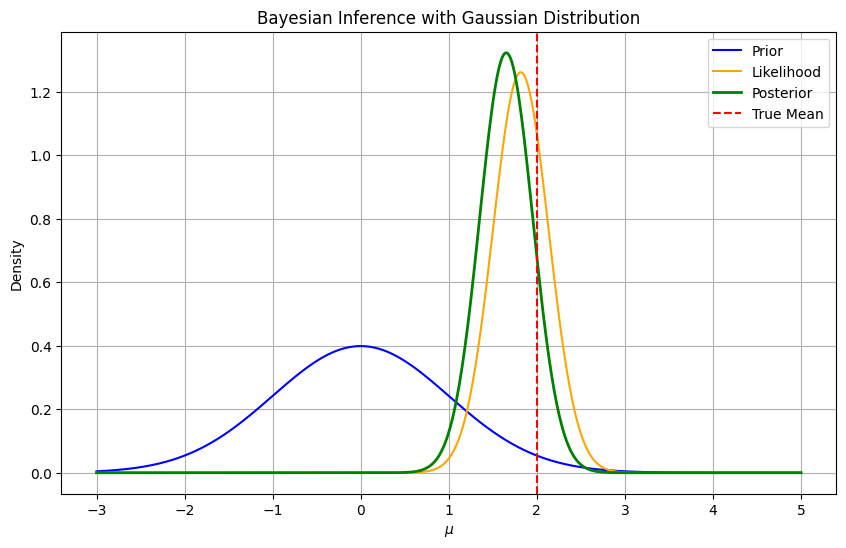

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu_0, sigma_0 = 0, 1  # Prior mean and std dev
mu_true, sigma = 2, 1  # True mean and known std dev
n = 10  # Number of data points
data = np.random.normal(mu_true, sigma, n)  # Simulated data
x_bar = np.mean(data)  # Sample mean

# Posterior parameters
sigma_n = 1 / np.sqrt(1/sigma_0**2 + n/sigma**2)
mu_n = (sigma**2 * mu_0 + n * sigma_0**2 * x_bar) / (sigma**2 + n * sigma_0**2)

# Grid for plotting
mu_grid = np.linspace(-3, 5, 500)

# Distributions
prior = norm.pdf(mu_grid, mu_0, sigma_0)
likelihood = norm.pdf(mu_grid, x_bar, sigma / np.sqrt(n))  # Likelihood is Gaussian
posterior = norm.pdf(mu_grid, mu_n, sigma_n)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mu_grid, prior, label='Prior', color='blue')
plt.plot(mu_grid, likelihood, label='Likelihood', color='orange')
plt.plot(mu_grid, posterior, label='Posterior', color='green', linewidth=2)
plt.axvline(mu_true, color='red', linestyle='--', label='True Mean')
plt.title('Bayesian Inference with Gaussian Distribution')
plt.xlabel('$\mu$')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

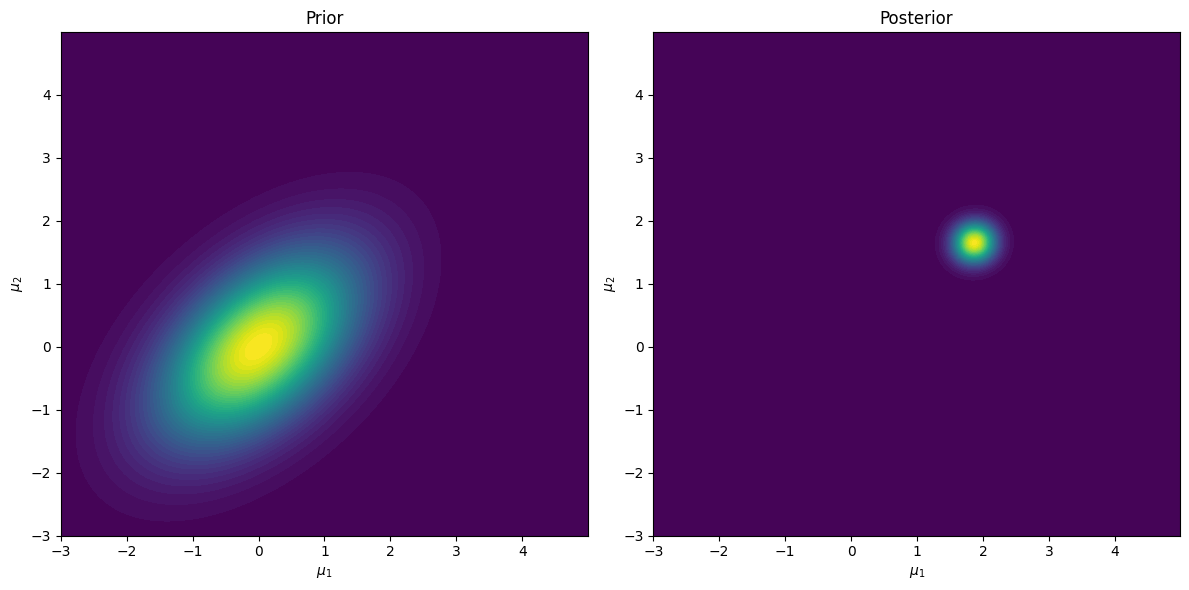

In [4]:
from scipy.stats import multivariate_normal

# Parameters
mu_0 = np.array([0, 0])  # Prior mean
Sigma_0 = np.array([[1, 0.5], [0.5, 1]])  # Prior covariance
mu_true = np.array([2, 2])  # True mean
Sigma = np.array([[1, 0], [0, 1]])  # Known covariance
data = np.random.multivariate_normal(mu_true, Sigma, 20)  # Simulated data
x_bar = np.mean(data, axis=0)

# Posterior parameters
Sigma_n = np.linalg.inv(np.linalg.inv(Sigma_0) + len(data) * np.linalg.inv(Sigma))
mu_n = Sigma_n @ (np.linalg.inv(Sigma_0) @ mu_0 + len(data) * np.linalg.inv(Sigma) @ x_bar)

# Grid for plotting
x, y = np.mgrid[-3:5:.01, -3:5:.01]
pos = np.dstack((x, y))

# Distributions
prior = multivariate_normal(mu_0, Sigma_0).pdf(pos)
posterior = multivariate_normal(mu_n, Sigma_n).pdf(pos)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].contourf(x, y, prior, levels=50, cmap='viridis')
axes[0].set_title('Prior')
axes[0].set_xlabel('$\mu_1$')
axes[0].set_ylabel('$\mu_2$')

axes[1].contourf(x, y, posterior, levels=50, cmap='viridis')
axes[1].set_title('Posterior')
axes[1].set_xlabel('$\mu_1$')
axes[1].set_ylabel('$\mu_2$')

plt.tight_layout()
plt.show()